# SALE ANALYST
1. Tháng nào có doanh số tốt nhất ? Doanh số tháng max là bao nhiêu ?
2. TP nào có ds cao nhất ?
3. Doanh nghiệp nên chiếu QC vào thời gian nào để tăng khả năng mua hàng của khách hàng ?
4. Những sản phẩm nào thường được bán cùng nhau?
5. Sản phẩm được bán nhiều nhất ?
6. Giả thuyết của bạn về ản phẩm được bán nhiều nhất là?
<!-- Các bước xử lý dữ liệu:
Task1 : Set up environment and load data
Task 2: Clean and preprocess data
Task 3: Report and Conduct analysis
 -->


## Set up environment and load data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import matplotlib.pyplot as plt
import os 




In [2]:
# Load a data
path = 'D:/manguon/project/data/sales2019_1.csv'
dataframe = pd.read_csv(path)
dataframe.head()
# Load datas
path = 'D:/manguon/project/data/'
dataframe = pd.read_csv(path + 'sales2019_1.csv')
dataframe.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


## Task 2: Clean and preprocess data

In [3]:
# Gop nhieu file 12 : dung os
os.listdir(path) # Hien thi 12 file 

['.DS_Store',
 'data.ipynb',
 'sales2019_1.csv',
 'sales2019_10.csv',
 'sales2019_11.csv',
 'sales2019_12.csv',
 'sales2019_2.csv',
 'sales2019_3.csv',
 'sales2019_4.csv',
 'sales2019_5.csv',
 'sales2019_6.csv',
 'sales2019_7.csv',
 'sales2019_8.csv',
 'sales2019_9.csv']

In [4]:
# Lay duong dan tuyet doi tung file 
filepaths = []
for file in os.listdir(path):
    if file.endswith('.csv'): # Chi lay duoi file .csv
        filepath = path + file
        filepaths.append(filepath)
print(filepaths)

# Lay ra 1 file: 
df1 = pd.read_csv(filepaths[3])
df1

['D:/manguon/project/data/sales2019_1.csv', 'D:/manguon/project/data/sales2019_10.csv', 'D:/manguon/project/data/sales2019_11.csv', 'D:/manguon/project/data/sales2019_12.csv', 'D:/manguon/project/data/sales2019_2.csv', 'D:/manguon/project/data/sales2019_3.csv', 'D:/manguon/project/data/sales2019_4.csv', 'D:/manguon/project/data/sales2019_5.csv', 'D:/manguon/project/data/sales2019_6.csv', 'D:/manguon/project/data/sales2019_7.csv', 'D:/manguon/project/data/sales2019_8.csv', 'D:/manguon/project/data/sales2019_9.csv']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [5]:
# Gop file:
frames = []
for file in os.listdir(path): # Vong lap chay qua tung tap tin 
    if file.endswith('.csv'):
        filepath = path + file # Tao path cho tung tap tin 
        df1 = pd.read_csv(filepath) # Tao data frame cho tung tap tin dua tren path cua no
        frames.append(df1) # Them dataframe do vao trong danh sach frame  
        result = pd.concat(frames) # Truyen danh sach do vao pt concat 
result

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [6]:
# Kiem tra merger:
all_length = []
frames = []
for file in os.listdir(path): # Vong lap chay qua tung tap tin 
    if file.endswith('.csv'):
        filepath = path + file # Tao path cho tung tap tin 
        df1 = pd.read_csv(filepath) # Tao data frame cho tung tap tin dua tren path cua no
        frames.append(df1) # Them dataframe do vao trong danh sach frame  
        result = pd.concat(frames) # Truyen danh sach do vao pt concat 

        length_1month = len(df1.index)
        all_length.append(length_1month)
df = result

In [7]:
print(sum(all_length))
#  Bang nhau 

186850


In [8]:
# Xuat du lieu da gop, va bo cot index
df.to_csv('annualSlales2019.csv', index=False)

## Question 


### 1. Tháng nào có doanh số tốt nhất ? Doanh số tháng max là bao nhiêu ?

In [9]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"


In [10]:
df['Month'] = ''
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",


In [11]:
# Tach thang ra thanh cot rieng: Slice 
df['Order Date'].str.slice(0,2,1) # C1
df['Month'] = df['Order Date'].str[0:2] # C2


In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [13]:
print(set(df['Month']))
# Xuat hien 2 gia tri la NaN: gia tri mat trong dataset va Or

{'03', '09', '10', '01', '07', '12', '02', 'Or', '04', nan, '05', '08', '11', '06'}


In [14]:
# Bo gia tri NAN
df = df.dropna(how='all')
print(set(df['Month']))


{'03', '09', '10', '01', '07', '12', '02', 'Or', '04', '05', '08', '11', '06'}


In [15]:
# Bo gia tri "or"
# Truy cap month 
df[df['Month'] == 'Or']
# or = ORDER DATE la tieu de cot 


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [16]:
# Loai bo or 
df = df[df['Month'] != 'Or']
df
# Kiem tra 
df[df['Month'] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


## Task 3: Report and Conduct analysis

### 1. Tháng nào có doanh số tốt nhất ? Doanh số tháng max là bao nhiêu ?

In [17]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
'''Khac kieu du lieu'''

TypeError: can't multiply sequence by non-int of type 'str'

In [18]:
# Xem kieu du lieu
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

object
object


In [19]:
#  Chuyen sang dang so:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'] ,downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'] ,downcast='integer')

In [20]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.99


In [21]:
#  Chuyen Sales lai gan order date
# Dung pop cat colums:
moving_colums = df.pop('Sales')
# Chen
df.insert(4, 'Sales', moving_colums)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [22]:
# Loc du lieu theo thang 
df.groupby('Month').sum()['Sales']

Month
01    1822256.73
02    2202022.42
03    2807100.38
04    3390670.24
05    3152606.75
06    2577802.26
07    2647775.76
08    2244467.88
09    2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

In [23]:
#  Luu vao bien sales_value
sales_value = df.groupby('Month').sum()['Sales']
# Tim max 
sales_value.max()

4613443.34

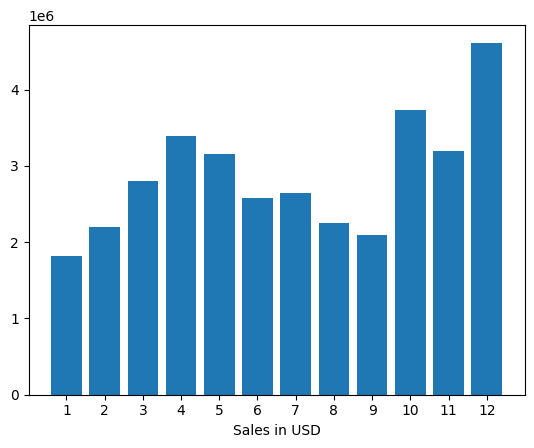

In [24]:
# Ve bieu do 
# x= month: thang/ y= height do cao doanh thu 
months = range(1,13) 
plt.bar(x=months, height=sales_value)
plt.xticks(months) #Hien thang le
plt.xlabel('months')
plt.xlabel('Sales in USD')
plt.show()


### 2. TP nào có ds cao nhất ?

In [25]:
# Dung ham lay ra tp
address_to_city = lambda address:address.split(',')[1]

In [26]:
df['City'] = df['Purchase Address'].apply(address_to_city)

In [27]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [28]:
sales_value_city = df.groupby('City').sum()['Sales']
sales_value_city.max() 

8262203.91

In [29]:
# Lay ten TP truc tiep tu ds 
cities = [city
for city, sales in sales_value_city.items()]
cities

[' Atlanta',
 ' Austin',
 ' Boston',
 ' Dallas',
 ' Los Angeles',
 ' New York City',
 ' Portland',
 ' San Francisco',
 ' Seattle']

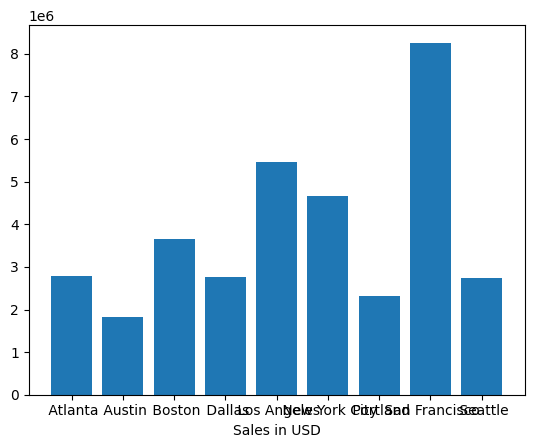

In [30]:
# cities = df['City'].unique()
plt.bar(x=cities, height=sales_value_city)
plt.xticks(cities) 
plt.xlabel('cities')
plt.xlabel('Sales in USD')
plt.show()

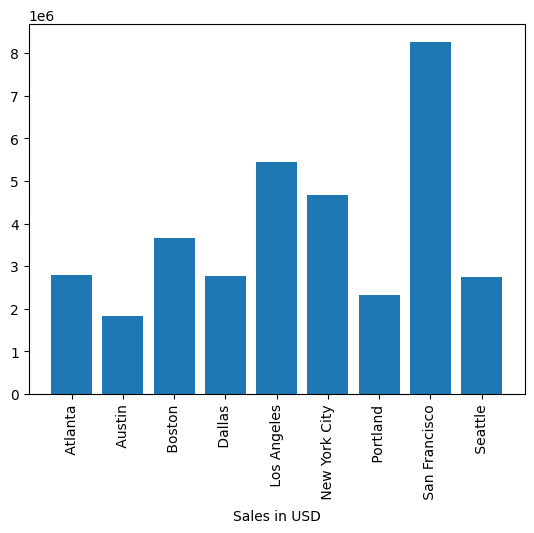

In [31]:
#  xoay ten tp 
# cities = df['City'].unique()
plt.bar(x=cities, height=sales_value_city)
plt.xticks(cities,rotation = 90) 
plt.xlabel('cities')
plt.xlabel('Sales in USD')
plt.show()

#### Tháng 12 có doanh thu cao vì sao? 
<!-- Lễ chrismas, new year  -->
<!--  Các hãng điện tử lớn thường cho ra mắt sản phẩm vào quý 3  -->
<!-- Tại sao San Francisco có doanh thu cao nhất ? -->
<!-- Silicon valey tọa lạc ở San Francisco cho nên các công ty công nghệ nhắm đến đây để mua hàng -->
<!-- Ở đây có nhiều kĩ sư hơn nơi khác và họ dùng nhiều đồ công nghệ  -->

In [ ]:
'''Tim fa nhun hien new'''

In [40]:
address_to_city = lambda address:address.split(',')[1]
address_to_city

<function __main__.<lambda>(address)>

### 3. Doanh nghiệp nên chiếu QC vào thời gian nào để tăng khả năng mua hàng của khách hàng ?

In [32]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco


In [37]:
#  Kiem tra kieu du lieu cot orderdate
print(df['Order Date'].dtypes)

object


In [39]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
print(df['Order Date'].dtypes)

datetime64[ns]


In [44]:
# vd:
ex = '01/22/19 21:25'
ex_time = pd.to_datetime(ex)
ex_time.hour
ex_time.minute

25

In [51]:
df['Hours'] = df['Order Date'].dt.hour

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,hour,Hours
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21,21
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14,14
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13,13
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20,20
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11,11


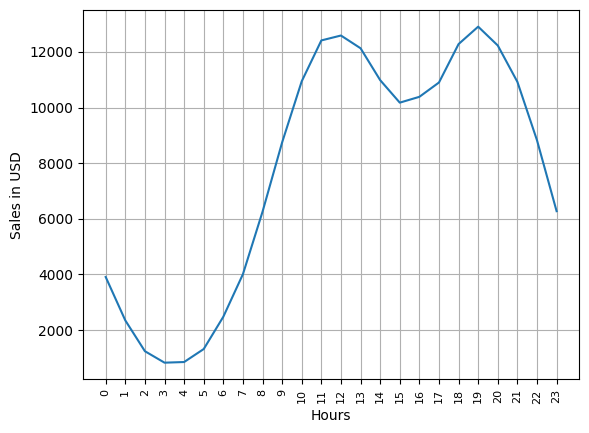

In [58]:
# Chart:
sales_value_hours = df.groupby('Hours').count()['Sales']
# Dem so don hang 
hours = [hour for hour, sales in sales_value_hours.items()]

plt.plot(hours, sales_value_hours)
plt.xticks(hours, rotation = 90, size = 8) 
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()

#### Đỉnh điểm mua hàng là từ 11h - 12h trưa và sau 7h tối , chạy quảng cáo trước 30p là ok nhất / nên tách theo Tp vì mỗi TP có thời gian khác nha 

### 4. Những sản phẩm nào thường được bán cùng nhau?

In [60]:
# Idea: trùng nhau: order cung luc, giao trung dia diem Order Date va Purchase Address =. cung order id
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,hour,Hours
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21,21
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14,14


In [68]:
# dulicated()
df_dup =df[df['Order ID'].duplicated(keep=False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,hour,Hours
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,16
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,16
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,8
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,8
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11,11


In [78]:
groupProduct = lambda product: ', '.join(product)

In [84]:
# Group hang theo order_id giong nhau
df_dup['All_product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


C:\Users\TAN\AppData\Local\Temp\ipykernel_20432\228042891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All_product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


In [85]:
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,hour,Hours,All_product
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,16,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,16,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11,11,"Vareebadd Phone, Wired Headphones"


In [87]:
# Loc DL
df_dup = df_dup[['Order ID','All_product']].drop_duplicates()

In [88]:
df_dup

,Order ID,All_product
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
11617,259296,"Apple Airpods Headphones, Apple Airpods Headph..."
11619,259297,"iPhone, Lightning Charging Cable, Lightning Ch..."
11627,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
11639,259314,"Wired Headphones, AAA Batteries (4-pack)"


In [90]:
df_dup['All_product'].value_counts().head(5)
# Top 5 san pham hay duoc ban cung nhau 

All_product
iPhone, Lightning Charging Cable         882
Google Phone, USB-C Charging Cable       856
iPhone, Wired Headphones                 361
Vareebadd Phone, USB-C Charging Cable    312
Google Phone, Wired Headphones           303
Name: count, dtype: int64

#### Khi biết được thông tin các sản phẩm hay được bán cùng nhau: 
<!-- Doanh nghiệp nên bán theo combo 1 sản phẩm ít bán chạy hơn để đẩy nhanh doanh số của sp ít bán chạy kia  -->
<!-- Đính kèm giảm giá => kích cầu tiêu dùng  -->

### 5. Sản phẩm được bán nhiều nhất ?

In [99]:
all_product = df.groupby('Product').count()['Quantity Ordered']
all_product

Product
20in Monitor                   4101
27in 4K Gaming Monitor         6230
27in FHD Monitor               7507
34in Ultrawide Monitor         6181
AA Batteries (4-pack)         20577
AAA Batteries (4-pack)        20641
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
Flatscreen TV                  4800
Google Phone                   5525
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      21658
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
USB-C Charging Cable          21903
Vareebadd Phone                2065
Wired Headphones              18882
iPhone                         6842
Name: Quantity Ordered, dtype: int64

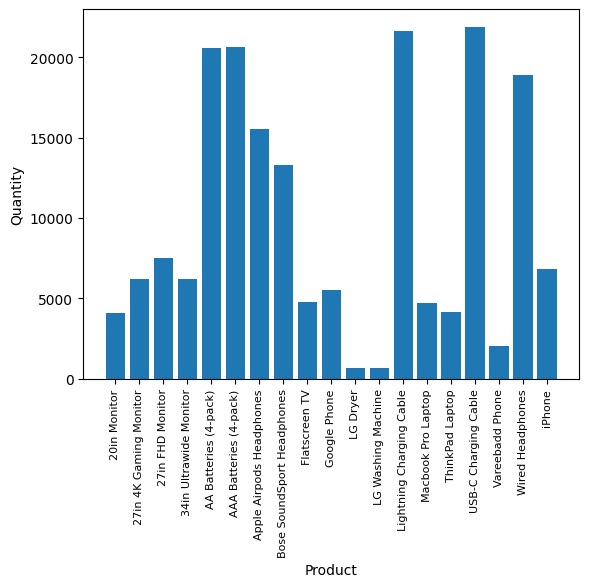

In [101]:
# Chart:
products_ls = [product for product, sales in all_product.items()]

plt.bar(products_ls, all_product)
plt.xticks(products_ls, rotation = 90, size = 8) 
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.show()

#### USB-C Charging Cable,Lightning Charging Cable là 2 sp bán chạy nhất:
<!-- Nguyên nhân: giá cả, thương hiệu , chất lượng sản phẩm  -->
<!-- Yếu tố giá có thể xác định được bằng cách: vẽ bd giá chồng lên ds  -->

In [117]:
prices = df.groupby('Product')['Price Each']
prices.head()

0       700.00
1        14.95
2        11.99
3       149.99
4        11.99
         ...  
1072    600.00
1079    600.00
1391    600.00
1556    600.00
1791    600.00
Name: Price Each, Length: 95, dtype: float64

In [123]:
#  Tim gia tung sp:
prices = df.groupby('Product')['Price Each']
prices = prices.mean()



C:\Users\TAN\AppData\Local\Temp\ipykernel_20432\4243966375.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products_ls, rotation=90, size=8)


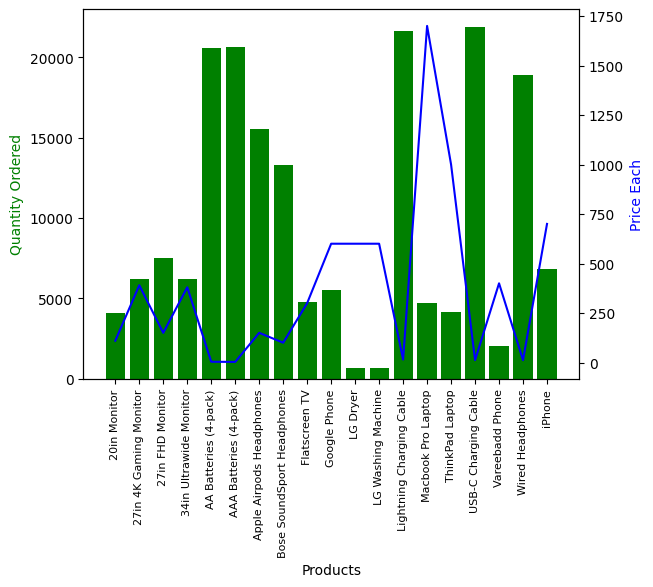

In [125]:
# Them truc trong bd
x = products_ls
y1 = all_product
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(products_ls, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')

plt.show()

#### Tuong quan giua gia va danh thu cua san pham: sản phẩm có giá thấp USB-C Charging Cable,Lightning Charging Cable bạn được nhiều hơn và ngược lại sp có giao cao doanh thu tương đối thấp 
<!-- 2 sản phẩm LG có giá tương đối thấp nhưng doanh số lại thấp hơn 2 sản phẩm của apple => ta thấp được yếu tố thương hiệu  -->